In [ ]:
import scipy.io as sio

pacientes = [l + str(i).zfill(2) + ".mat" for i in range(1,11) for l in "PS"]

In [80]:
import scipy.signal as sig
import pandas as pd

electrodes = [8, 44, 80, 131, 185]
dtfs = []

for paciente in pacientes:
    dtfspatient = None
    test = sio.loadmat(paciente)["data"]
    for electrode in electrodes:
        if (dtfspatient is None):
            dtfspatient = pd.DataFrame(test[:,electrode,:])
        else:
            dtfspatient.add(pd.DataFrame(test[:,electrode,:]))
            
    dtfs.append(dtfspatient / len(electrodes))
          
means = dtfs[0]
for dtf in dtfs[1:]:
    means.add(dtf)
means /= len(pacientes)

['P01.mat', 'S01.mat', 'P02.mat', 'S02.mat', 'P03.mat', 'S03.mat', 'P04.mat', 'S04.mat', 'P05.mat', 'S05.mat', 'P06.mat', 'S06.mat', 'P07.mat', 'S07.mat', 'P08.mat', 'S08.mat', 'P09.mat', 'S09.mat', 'P10.mat', 'S10.mat']


In [ ]:
import matplotlib.pyplot as plt

transforms = []
X = []
Y = []
Z = []

i = 0
mx = 0
for epoch in means.iterrows():
    y, z = sig.welch(epoch[1].as_matrix(), fs = 250, nfft = 2048)
    X.append([i]*len(y))
    Y.append(y)
    Z.append(z)
    mx = max(mx,max(z))
    i += 1
    

plt.figure(figsize=(13,8))
plt.pcolor(X, Y, Z)
plt.colorbar()
plt.ylim(0, 45)
plt.show()

KeyboardInterrupt: 

### 

In [29]:
import numpy as np

bandas = [0, 4, 8, 13, 30, 45]
bandaspaciente = []

for paciente in pacientes:
    dtfspatient = None
    test = sio.loadmat(paciente)["data"]
    avg1 = np.mean(test, axis = 1)
    avg2 = np.mean(avg1, axis = 0)
    freq, pot = sig.welch(avg2, fs = 250, nfft = 2048)
    bandaspaciente.append([])
    
    for i in range(len(bandas) -1):
        inicio = bandas[i] 
        fin = bandas[i+1]
        valores = [pot[i] for i in range(len(pot)) if freq[i] >= inicio and freq[i] < fin]
        bandaspaciente[-1].append(sum(valores))
        
pd.DataFrame(bandaspaciente, columns = ["delta", "theta", "alpha", "beta", "gamma"])
        
        

,delta,theta,alpha,beta,gamma
0,5.971387e-16,2.477154e-15,3.377644e-16,1.944572e-16,8.578907e-17
1,5.802518e-16,1.261071e-16,4.174309e-17,1.619341e-17,5.273575e-18
2,1.461110e-15,6.629701e-16,3.192479e-17,7.135959e-17,3.013951e-17
3,1.478595e-16,8.152845e-17,6.109572e-17,8.549430e-17,8.009665e-18
4,2.807486e-15,2.196640e-16,1.606378e-16,1.088312e-16,3.814656e-17
5,1.342811e-16,3.266903e-16,1.352351e-16,2.383262e-17,2.614189e-18
6,2.125603e-16,1.001721e-16,7.874032e-18,3.922668e-18,7.890123e-19
7,3.174434e-15,3.148949e-16,1.419281e-16,1.275466e-16,5.438455e-17
8,2.141288e-15,1.070968e-14,1.916304e-15,2.041439e-15,7.010046e-16
9,7.235134e-17,1.974057e-16,1.728645e-17,8.421191e-18,6.805728e-19


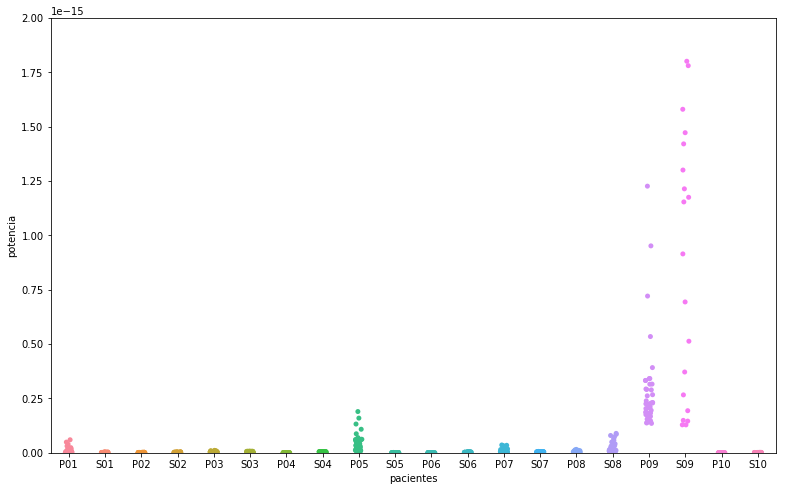

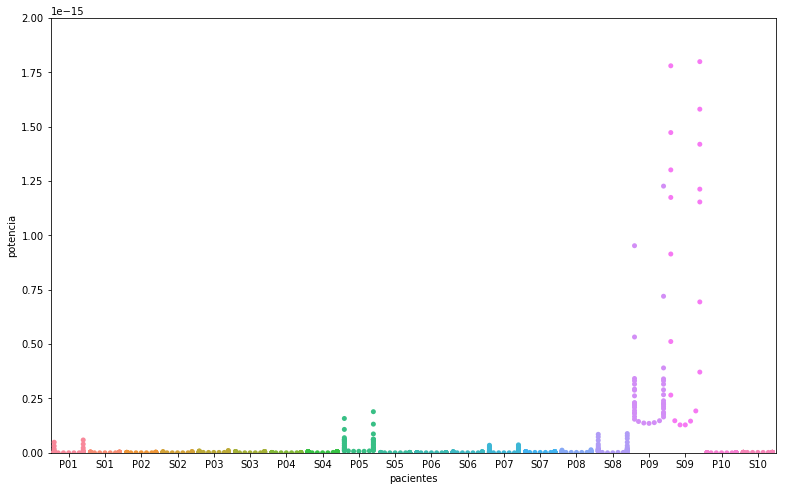

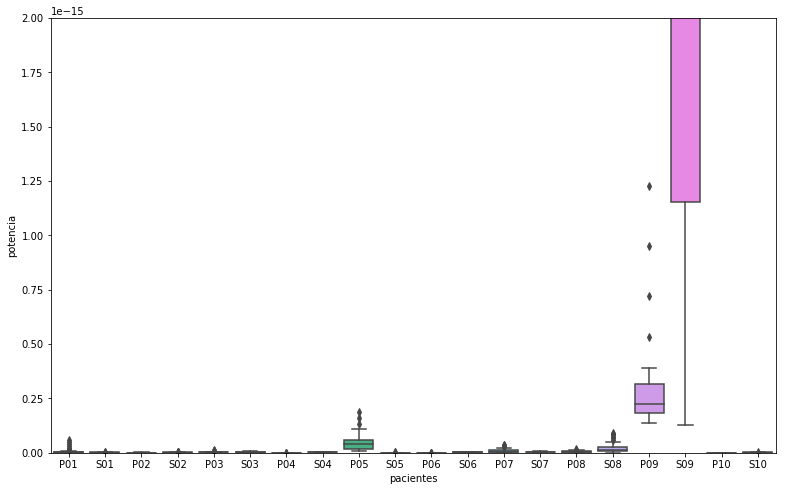

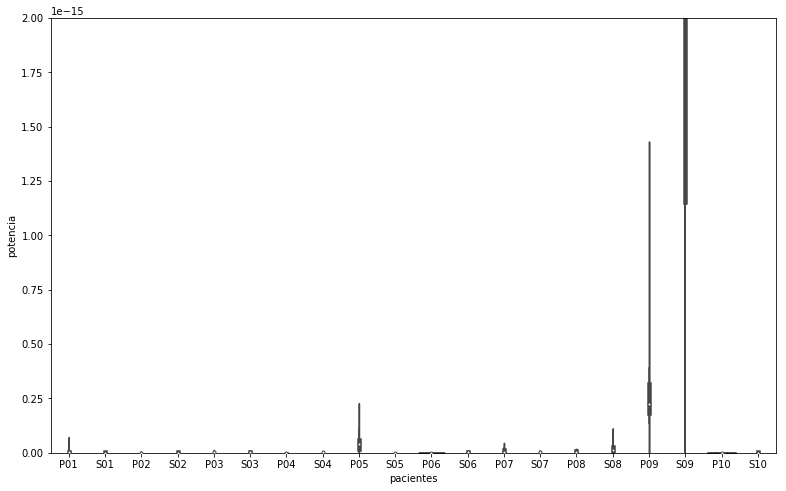

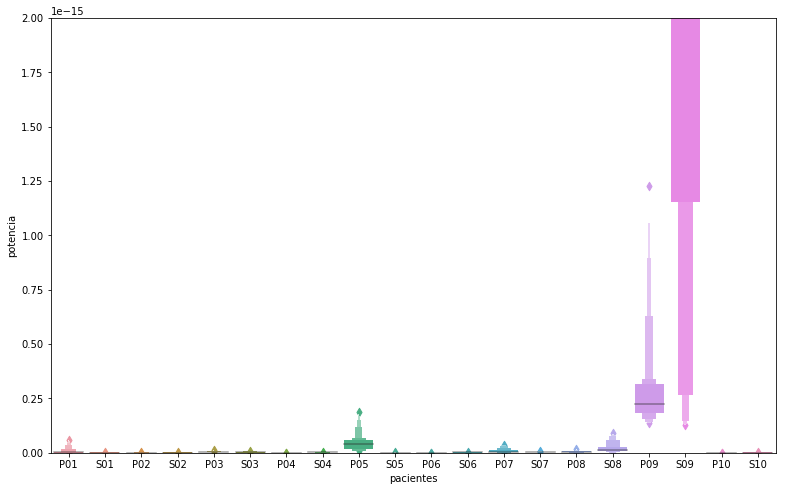

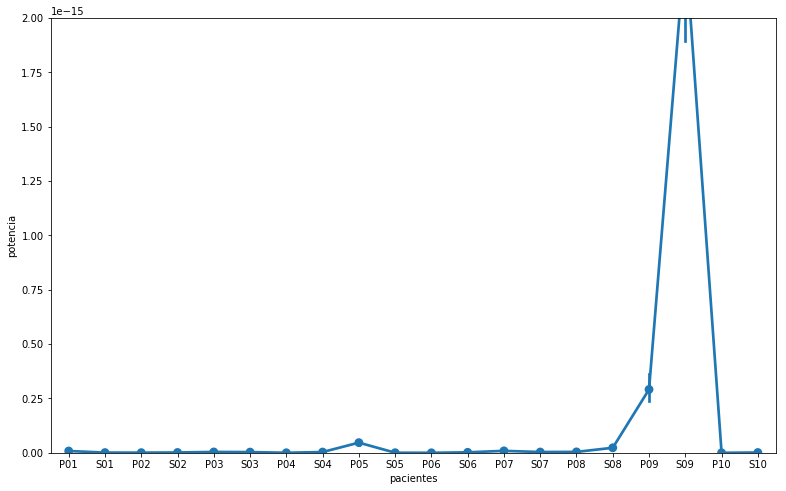

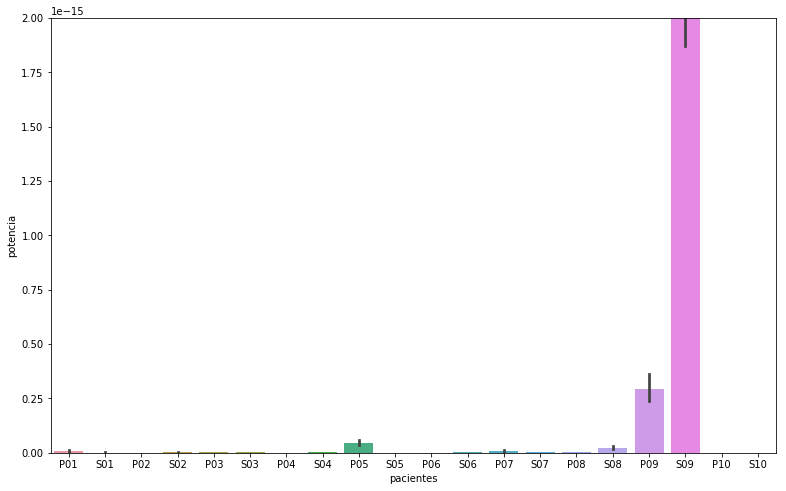

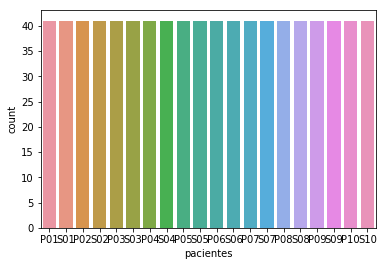

In [40]:
import seaborn as sb
import matplotlib.pyplot as plt
valores = []

for paciente in pacientes:
    test = sio.loadmat(paciente)["data"]
    avg1 = np.mean(test, axis = 1)
    avg2 = np.mean(avg1, axis = 0)
    freq, pot = sig.welch(avg2, fs = 250, nfft = 2048)
    inicio = 8
    fin = 13
    mx = 0
    for j in range(len(pot)):
        if freq[j] >= inicio and freq[j] < fin:
            valores.append((paciente[:3], pot[j]))
            mx = max(mx, pot[j])
            
mx = 2*10**(-15)
    
valoresdf = pd.DataFrame(valores, columns = ["pacientes", "potencia"])

plt.figure(figsize=(13,8))
sb.stripplot(x = "pacientes", y = "potencia", data = valoresdf, jitter = True)
plt.ylim(0, mx)
plt.show()

plt.figure(figsize=(13,8))
sb.swarmplot(x = "pacientes", y = "potencia", data = valoresdf)
plt.ylim(0, mx)
plt.show()

plt.figure(figsize=(13,8))
sb.boxplot(x = "pacientes", y = "potencia", data = valoresdf)
plt.ylim(0, mx)
plt.show()

plt.figure(figsize=(13,8))
sb.violinplot(x = "pacientes", y = "potencia", data = valoresdf)
plt.ylim(0, mx)
plt.show()

plt.figure(figsize=(13,8))
sb.lvplot(x = "pacientes", y = "potencia", data = valoresdf)
plt.ylim(0, mx)
plt.show()

plt.figure(figsize=(13,8))
sb.pointplot(x = "pacientes", y = "potencia", data = valoresdf)
plt.ylim(0, mx)
plt.show()

plt.figure(figsize=(13,8))
sb.barplot(x = "pacientes", y = "potencia", data = valoresdf)
plt.ylim(0, mx)
plt.show()

sb.countplot(x = "pacientes", data = valoresdf)
plt.show()

2.1.c violin



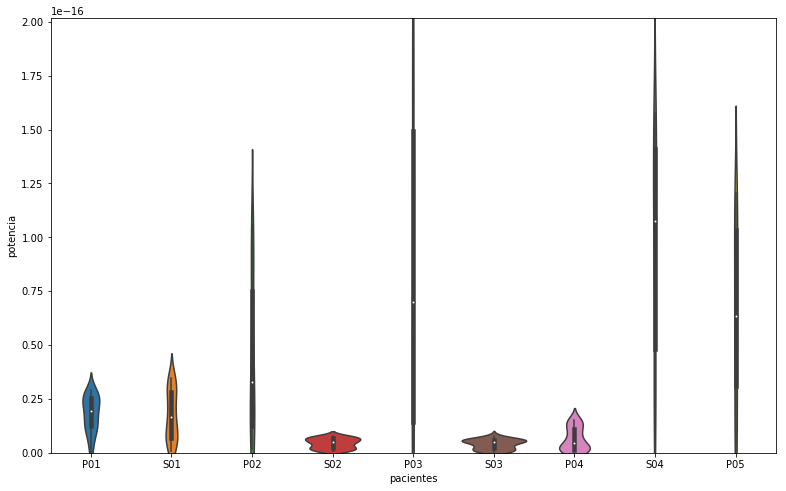

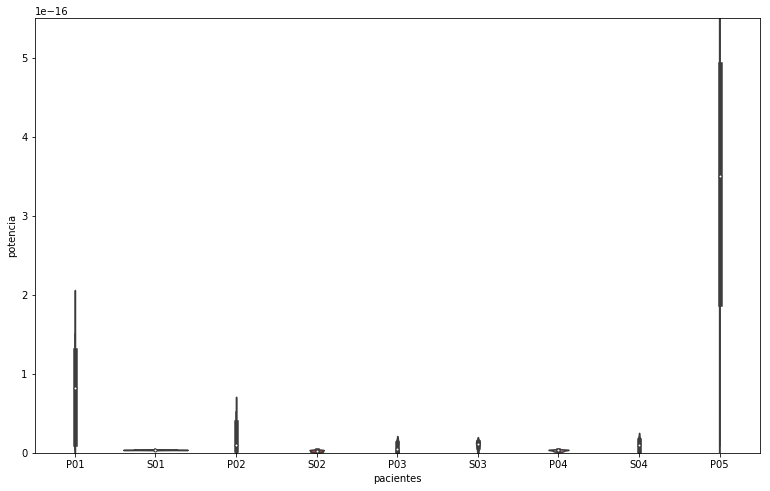

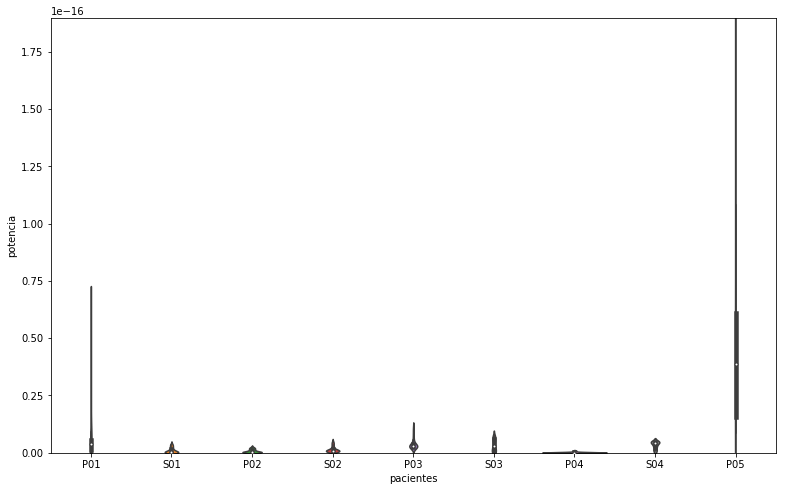

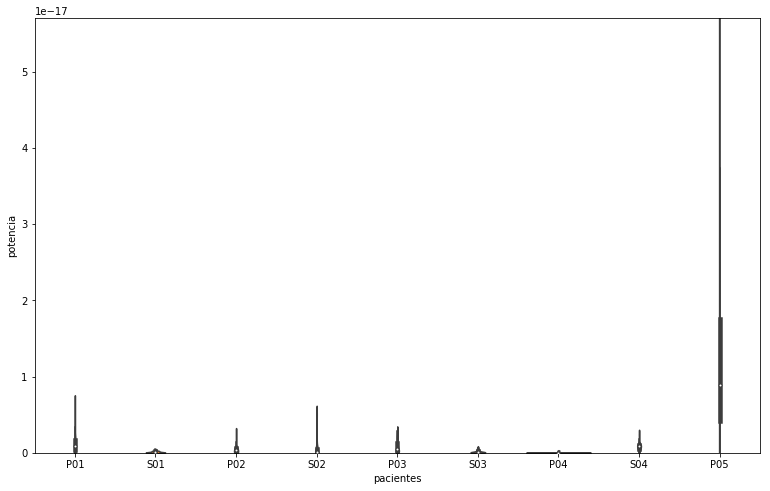

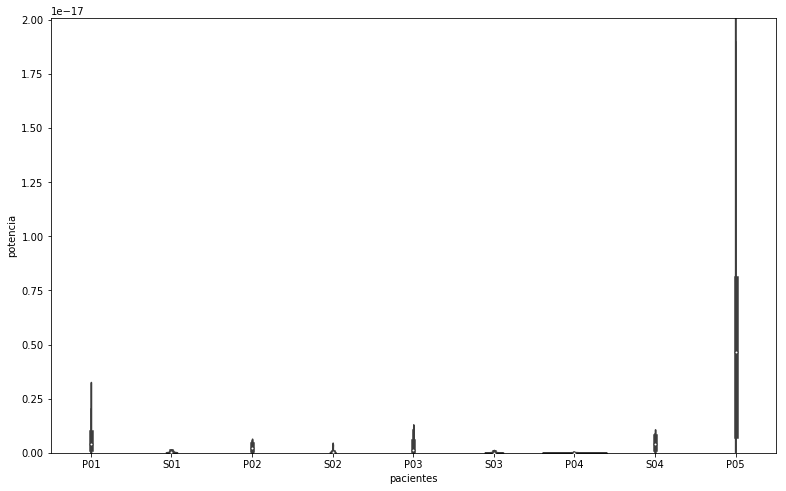

In [75]:
import numpy as np

bandas = [0, 4, 8, 13, 30, 45]
bandaspaciente = []
valores = [[] for i in range(len(bandas))]

for paciente in pacientes[:9]:
    dtfspatient = None
    test = sio.loadmat(paciente)["data"]
    avg1 = np.mean(test, axis = 1)
    avg2 = np.mean(avg1, axis = 0)
    freq, pot = sig.welch(avg2, fs = 250, nfft = 2048)
    bandaspaciente.append([])
    
    for i in range(len(bandas) -1):
        inicio = bandas[i] 
        fin = bandas[i+1]
        for j in range(len(pot)):
            if freq[j] >= inicio and freq[j] < fin:
                valores[i].append((paciente[:3], pot[j]))

for i in range(len(bandas) -1):
    valoresdf = pd.DataFrame(valores[i], columns = ["pacientes", "potencia"])

    plt.figure(figsize=(13,8))
    sb.violinplot(x = "pacientes", y = "potencia", data = valoresdf)
    plt.ylim(0, max([v[1] for v in valores[i]]))
    plt.show()
    

In [ ]:
import numpy as np
import scipy
#import scipy.stats.ttest_rel
import math

bandas = [0, 4, 8, 13, 30, 45]
valores = [[] for i in range(len(bandas))]
entropies = []

for paciente in pacientes:
    dtfspatient = None
    test = sio.loadmat(paciente)["data"]
    avg2 = np.mean(test, axis = 0)
    for electrode in avg2:
        bins = 25
        hist = np.histogram(electrode, bins)
        suma = float(sum(hist[0]))
        aux = [i/suma * math.log(i/suma) for i in hist[0] if i!=0]
        entropy = -sum(aux)
        entropies.append((paciente[0], entropy))
    avg1 = np.mean(test, axis = 1)
    avg2 = np.mean(avg1, axis = 0)
    # Deshardcodear
    bins = 25
    hist = np.histogram(avg2, bins)
    suma = float(sum(hist[0]))
    aux = [i/suma * math.log(i/suma) for i in hist[0] if i!=0]
    entropy = -sum(aux)
    entropies.append((paciente[0], entropy))
        

valoresdf = pd.DataFrame(entropies, columns = ["pacientes", "entropia"])
plt.figure(figsize=(13,8))
sb.violinplot(x = "pacientes", y = "entropia", data = valoresdf)
plt.ylim(0, max([v[1] for v in entropies]))
plt.show()

### Test Estadistico ###

##[|pacientes: P/S, entropia: num|]
patients_p = valoresdf[::2]
patients_s = valoresdf[1::2] 
    
testResult = scipy.stats.ttest_rel(patients_p, patients_s)

    
    


In [ ]:
import numpy as np
import math

bandas = [0, 4, 8, 13, 30, 45]
valores = [[] for i in range(len(bandas))]
entropies = []

for paciente in pacientes[:3]:
    dtfspatient = None
    test = sio.loadmat(paciente)["data"]
    avg1 = np.mean(test, axis = 0)
    print len(avg1), len(avg1[0])
    # Deshardcodear
    for electrode in avg1:
        bins = 25
        hist = np.histogram(avg2, bins)
    suma = float(sum(hist[0]))
    aux = [i/suma * math.log(i/suma) for i in hist[0] if i!=0]
    entropy = -sum(aux)
    entropies.append((paciente[0], entropy))
        

valoresdf = pd.DataFrame(entropies, columns = ["pacientes", "entropia"])
plt.figure(figsize=(13,8))
sb.violinplot(x = "pacientes", y = "entropia", data = valoresdf)
plt.ylim(0, max([v[1] for v in entropies]))
plt.show()